<table><tr>
<td> 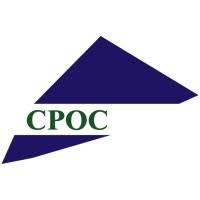 </td>
<td> 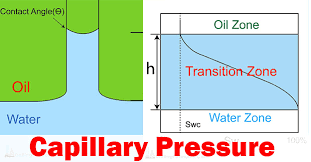 </td>
</tr></table>

<h1 align=center><font size = 4> Munish Kumar </font></h1>
<h1 align=center><font size = 4> P5628_MTJA_CCS_Feasibility </font></h1>
<h1 align=center><font size = 4> Capillary Pressure </font></h1>
<h1 align=center><font size = 3> ERCE 2022 </font></h1>

#### Libraries

In [1]:
# Only install the following libraries if you dont have it, otherwise leave it commented out

#!conda install -c anaconda natsort --yes
#!conda install -c anaconda xlrd --yes
#!pip install sympy --user

# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
from natsort import natsorted
sns.set()

# Sklearn Liraries
from sklearn import preprocessing

# For Latex style text
from sympy import S, symbols, printing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

# Display max rows
pd.set_option('display.max_rows', 500)

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


###### Declare some global variables

In [2]:
dir_name = r'C:\Users\mkumar\Documents\GitHub\munishkumar-gh.github.io\Core_Analysis_CPOC'
filename_suffix = 'csv'

# Font, marker size and axis rotation
edgecolors = 'black'
markersize = 16
alpha = 0.5
size = 18
rotation = 0

###### Series of Functions

In [3]:
# Function to look at first 5 and last 5 elements in a dataframe
def ends(df, x=5):
    return df.head(x).append(df.tail(x))
setattr(pd.DataFrame,'ends',ends)

In [4]:
# Function to read out file
def file_out(df, dir_name, base_filename, filename_suffix):
    try:
        csvs_sht = os.path.join(dir_name, base_filename + "." + filename_suffix)
        df.to_csv(csvs_sht, index = False, header=True)
        print ("Final File Extract Produced")
    except IOError:
        print("I/O error")
    return

In [5]:
# Function to search for a text string
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

In [6]:
# Plotting function
def plot_figure(nrows, ncols, height, width, a , x, y, 
                rotation, size, xlimit, ylimit, xlabel, ylabel, title, 
                labels, xmin, ymin):  

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols)
    fig.set_figwidth(width)
    fig.set_figheight(height)  
    
    plt.subplot(nrows, ncols, a)  
    plt.plot(x, y, 'o-', label=labels)        
    plt.xticks(rotation = rotation, fontsize=size)
    plt.yticks(rotation = rotation, fontsize=size)
    plt.xlim(xmin, xlimit)
    plt.ylim(ymin, ylimit)
    plt.xlabel(xlabel, fontsize=size)
    plt.ylabel(ylabel, fontsize=size)
    plt.title(title, fontsize=size)
    plt.legend(loc='upper right', fontsize = size-10)
        
    a = a + 1
    plt.subplot(nrows, ncols, a)        
    plt.plot(x, y, 'o-', label=labels)
    plt.yscale('log')
    plt.xticks(rotation = rotation, fontsize=size)
    plt.yticks(rotation = rotation, fontsize=size)
    plt.xlim(xmin, xlimit)
    plt.ylim(ymin, ylimit)
    plt.xlabel(xlabel, fontsize=size)
    plt.ylabel('(Log) ' + ylabel, fontsize=size)
    plt.title(title, fontsize=size)
    plt.legend(loc='upper right', fontsize = size-10)
        
    return

In [7]:
def plot_Scatter_with_line(RedFunction, BlueFunction, LineFunction, label, xlabel, ylabel, title):
    height=10
    width=10
    size = 20
    n = 8
    rows=1
    cols=1
    label=label

    fig, ax = plt.subplots(nrows=rows, ncols=cols)
    fig.set_figwidth(width)
    fig.set_figheight(height)

    plt.scatter(RedFunction, BlueFunction, label = label, s=size*n, c = 'r')
    plt.plot(RedFunction, LineFunction, '-k', linewidth = size/n)

    plt.xlim(0, 10)
    plt.ylim(0, 100)
    plt.xlabel(xlabel, fontsize = size+5)
    plt.ylabel(ylabel, fontsize = size+5)
    plt.legend(loc='upper left', fontsize = size+5)

    font = {'family' : 'Sans-serif',
            'weight' : 'bold',
            'size'   : size}
    plt.rc('font', **font)

    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = size-5)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = size-5)

    plt.show()
    return 

## Main Code

##### Read in the data and some preprocessing

In [8]:
# Header file comes preformatted as 1st row is variable name, 2nd row reads units
# Combines the first 2 rows of header into 1 header

df = pd.read_excel(
    'Pc_CPOC.xlsx', 
    header=[3], 
    sheet_name='Pc', 
    keep_default_na=True,
    #skiprows = 3
    #usecols="A,C:AA"
)
df.columns=df.columns.to_flat_index()
df.ends(3)

C:\Users\mkumar\AppData\Local\Temp\ipykernel_13848\3237448987.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.head(x).append(df.tail(x))


,K_klin (mD),9.64,4.03,5.94,122,24.5,200,6000,577,545,...,73.6,129,144,31.6,14.8,4261,19.7,2658,1575,350
0,Porosity (%),15.7,14.5,17.6,21.5,19.6,24.1,27.8,25.5,30.9,...,26.3,25.5,25.7,20.73,16.9,32.3,21.7,31.7,30,26.8
1,Pressure,9.64 Sw,4.03 Sw,5.94 Sw,122 Sw,24.5 Sw,200 Sw,6000 Sw,577 Sw,545 Sw,...,73.6 Sw,129 Sw,144 Sw,31.6 Sw,14.8 Sw,4261 Sw,19.7 Sw,2658 Sw,1575 Sw,350 Sw
2,psi,%,%,%,%,%,%,%,%,%,...,%,%,%,%,%,%,%,%,%,%
11,250,18.689313,20.011184,17.627185,23.895055,32.4722,24.497444,16.12201,18.391667,17.74844,...,17.369363,16.097169,15.255753,24.708804,39.193872,7.605636,26.775368,10.56992,12.927765,12.374171
12,500,17.691695,19.06707,17.001872,22.380923,27.645396,21.726566,15.959984,16.157037,17.567769,...,15.887873,14.199244,14.025525,23.33519,37.117851,NaN,NaN,NaN,NaN,NaN
13,750,17.034552,18.417366,16.446587,21.683522,26.165084,20.018597,15.802166,15.064535,17.544854,...,15.231549,13.262158,13.480514,23.13617,36.198139,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns.values

array(['K_klin (mD)', 9.64, 4.03, 5.94, 122, 24.5, 200, 6000, 577, 545,
       541, 513, 408, 2.45, 415, 45.4, 598, 87.5, 8.22, 5.99, 13.5, 24.6,
       73.6, 129, 144, 31.6, 14.8, 4261, 19.7, 2658, 1575, 350],
      dtype=object)

In [10]:
# renaming the columns - each column is now labelled with the permeability name
df.columns = ['Pc_lab (psi)', 9.64, 4.03, 5.94, 122, 24.5, 200, 6000, 577, 545,
       541, 513, 408, 2.45, 415, 45.4, 598, 87.5, 8.22, 5.99, 13.5, 24.6,
       73.6, 129, 144, 31.6, 14.8, 4261, 19.7, 2658, 1575, 350,
             ]

In [11]:
df.columns.values

array(['Pc_lab (psi)', 9.64, 4.03, 5.94, 122, 24.5, 200, 6000, 577, 545,
       541, 513, 408, 2.45, 415, 45.4, 598, 87.5, 8.22, 5.99, 13.5, 24.6,
       73.6, 129, 144, 31.6, 14.8, 4261, 19.7, 2658, 1575, 350],
      dtype=object)

In [12]:
df.drop([0, 1, 2], inplace = True)
df = df.astype(float)
df.ends(4)

C:\Users\mkumar\AppData\Local\Temp\ipykernel_13848\3237448987.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.head(x).append(df.tail(x))


,Pc_lab (psi),9.64,4.03,5.94,122,24.5,200,6000,577,545,...,73.6,129,144,31.6,14.8,4261,19.7,2658,1575,350
3,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
4,1.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,68.971058,100.000000,87.962162,...,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN
5,2.0,100.000000,100.000000,100.000000,86.366730,100.000000,75.513741,46.784119,51.725561,65.400766,...,82.752434,80.821373,76.466512,91.631833,98.683806,46.133280,100.000000,43.096706,41.206010,67.680944
6,5.0,77.352760,100.000000,78.695615,46.059977,69.210928,54.049955,27.070517,33.803641,38.988491,...,55.864482,55.195323,48.200687,68.979940,81.650865,22.767604,100.000000,26.934945,31.209986,43.620320
10,100.0,21.262846,22.349364,21.256741,26.054968,37.375388,27.494537,16.252012,19.893705,18.222144,...,20.308834,19.505341,17.696686,28.819188,43.312972,11.474332,28.903653,13.586244,15.389962,14.376358
11,250.0,18.689313,20.011184,17.627185,23.895055,32.472200,24.497444,16.122010,18.391667,17.748440,...,17.369363,16.097169,15.255753,24.708804,39.193872,7.605636,26.775368,10.569920,12.927765,12.374171
12,500.0,17.691695,19.067070,17.001872,22.380923,27.645396,21.726566,15.959984,16.157037,17.567769,...,15.887873,14.199244,14.025525,23.335190,37.117851,NaN,NaN,NaN,NaN,NaN
13,750.0,17.034552,18.417366,16.446587,21.683522,26.165084,20.018597,15.802166,15.064535,17.544854,...,15.231549,13.262158,13.480514,23.136170,36.198139,NaN,NaN,NaN,NaN,NaN


In [13]:
df.interpolate(method ='spline',
               order = 1,
               limit_direction ='both',
               inplace = True,              
                )
df

,Pc_lab (psi),9.64,4.03,5.94,122,24.5,200,6000,577,545,...,73.6,129,144,31.6,14.8,4261,19.7,2658,1575,350
3,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
4,1.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,68.971058,100.000000,87.962162,...,100.000000,100.000000,100.000000,100.000000,100.000000,73.374340,100.359274,71.434761,71.185073,83.010231
5,2.0,100.000000,100.000000,100.000000,86.366730,100.000000,75.513741,46.784119,51.725561,65.400766,...,82.752434,80.821373,76.466512,91.631833,98.683806,46.133280,100.000000,43.096706,41.206010,67.680944
6,5.0,77.352760,100.000000,78.695615,46.059977,69.210928,54.049955,27.070517,33.803641,38.988491,...,55.864482,55.195323,48.200687,68.979940,81.650865,22.767604,100.000000,26.934945,31.209986,43.620320
7,10.0,60.118696,65.040654,62.992700,38.837220,53.150715,36.439593,21.323098,26.881480,28.253973,...,39.838950,39.172878,32.058370,54.298014,67.497937,18.035466,59.061828,21.939313,25.881862,31.781646
8,25.0,37.612945,38.826147,44.884257,32.819777,43.624851,29.976885,17.665995,24.258822,21.344647,...,28.306427,27.487158,24.337879,42.087018,53.567252,15.222450,40.739787,18.017422,20.702464,21.782503
9,50.0,26.609711,27.440024,31.410351,29.786993,40.133265,28.950217,16.409670,21.386491,19.432616,...,23.621545,23.151885,20.447558,34.149505,47.955096,13.489658,32.937745,15.754560,17.751912,17.203069
10,100.0,21.262846,22.349364,21.256741,26.054968,37.375388,27.494537,16.252012,19.893705,18.222144,...,20.308834,19.505341,17.696686,28.819188,43.312972,11.474332,28.903653,13.586244,15.389962,14.376358
11,250.0,18.689313,20.011184,17.627185,23.895055,32.472200,24.497444,16.122010,18.391667,17.748440,...,17.369363,16.097169,15.255753,24.708804,39.193872,7.605636,26.775368,10.569920,12.927765,12.374171
12,500.0,17.691695,19.067070,17.001872,22.380923,27.645396,21.726566,15.959984,16.157037,17.567769,...,15.887873,14.199244,14.025525,23.335190,37.117851,6.278123,25.097434,8.661205,10.203772,8.402849


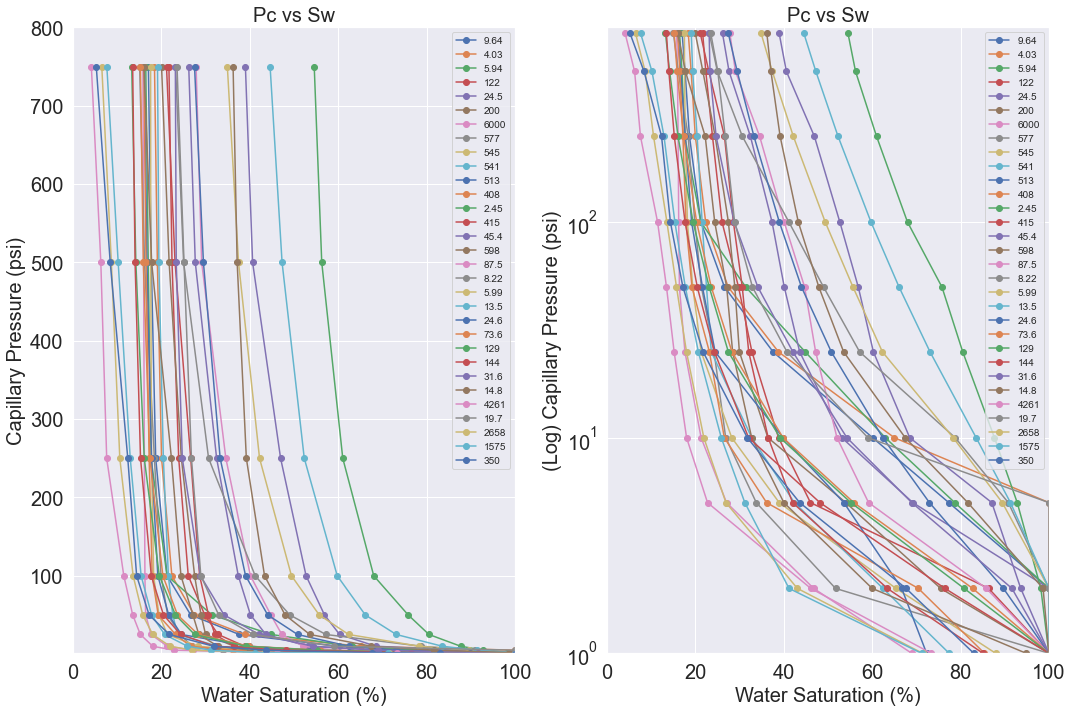

In [14]:
# To create Multiple plots
# Number of plot rows
nrows = 1
# Number of columns rows
ncols = 2
# counter
a = 1

# Other Variables
height=10
width=15
rotation = 0 
size = 20 

# Limits for plots
xmin = 0
ymin = 1
xlimit = 100
ylimit = 800

xlabel = 'Water Saturation (%)'
ylabel = 'Capillary Pressure (psi)'
title = 'Pc vs Sw'

labels = df.loc[:, df.columns != 'Pc_lab (psi)'].columns.values

x1 = df.loc[:, df.columns != 'Pc_lab (psi)'].values
y1 = df['Pc_lab (psi)']

plot_figure(nrows, ncols, height, width, a, x1, y1, 
            rotation, size, xlimit, ylimit, xlabel, ylabel, title, 
            labels, xmin, ymin
           )

plt.tight_layout()
plt.show()

In [15]:
# Gradients in psi/m
Water_Grad = 1.48 
Oil_Grad = 1
Gas_Grad = 0.4

#Air-Water interfacial tension
AW_sigma_cos_res = 40
AW_sigma_cos_lab = 72

#Oil-Water interfacial tension
OW_sigma_cos_res = 30
OW_sigma_cos_lab = 48

# Uncomment the applicable line of code
# Gas-Water only; assumes gas was the fluid used in lab Pc experiments
df['Pc_res (psi)'] = df['Pc_lab (psi)']*(AW_sigma_cos_res/AW_sigma_cos_lab)
df['Height (m)'] = df['Pc_res (psi)']/ (Water_Grad - Gas_Grad)

# Oil-Water only; assumes oil was the fluid used in lab Pc experiments
#df['Pc_res (psi)'] = df['Pc_lab (psi)']*(OW_sigma_cos_res/OW_sigma_cos_lab)
#df['h'] = df['Pc_res (psi)']/ (Water_Grad - Oil_Grad)

df

,Pc_lab (psi),9.64,4.03,5.94,122,24.5,200,6000,577,545,...,144,31.6,14.8,4261,19.7,2658,1575,350,Pc_res (psi),Height (m)
3,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000
4,1.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,68.971058,100.000000,87.962162,...,100.000000,100.000000,100.000000,73.374340,100.359274,71.434761,71.185073,83.010231,0.555556,0.514403
5,2.0,100.000000,100.000000,100.000000,86.366730,100.000000,75.513741,46.784119,51.725561,65.400766,...,76.466512,91.631833,98.683806,46.133280,100.000000,43.096706,41.206010,67.680944,1.111111,1.028807
6,5.0,77.352760,100.000000,78.695615,46.059977,69.210928,54.049955,27.070517,33.803641,38.988491,...,48.200687,68.979940,81.650865,22.767604,100.000000,26.934945,31.209986,43.620320,2.777778,2.572016
7,10.0,60.118696,65.040654,62.992700,38.837220,53.150715,36.439593,21.323098,26.881480,28.253973,...,32.058370,54.298014,67.497937,18.035466,59.061828,21.939313,25.881862,31.781646,5.555556,5.144033
8,25.0,37.612945,38.826147,44.884257,32.819777,43.624851,29.976885,17.665995,24.258822,21.344647,...,24.337879,42.087018,53.567252,15.222450,40.739787,18.017422,20.702464,21.782503,13.888889,12.860082
9,50.0,26.609711,27.440024,31.410351,29.786993,40.133265,28.950217,16.409670,21.386491,19.432616,...,20.447558,34.149505,47.955096,13.489658,32.937745,15.754560,17.751912,17.203069,27.777778,25.720165
10,100.0,21.262846,22.349364,21.256741,26.054968,37.375388,27.494537,16.252012,19.893705,18.222144,...,17.696686,28.819188,43.312972,11.474332,28.903653,13.586244,15.389962,14.376358,55.555556,51.440329
11,250.0,18.689313,20.011184,17.627185,23.895055,32.472200,24.497444,16.122010,18.391667,17.748440,...,15.255753,24.708804,39.193872,7.605636,26.775368,10.569920,12.927765,12.374171,138.888889,128.600823
12,500.0,17.691695,19.067070,17.001872,22.380923,27.645396,21.726566,15.959984,16.157037,17.567769,...,14.025525,23.335190,37.117851,6.278123,25.097434,8.661205,10.203772,8.402849,277.777778,257.201646


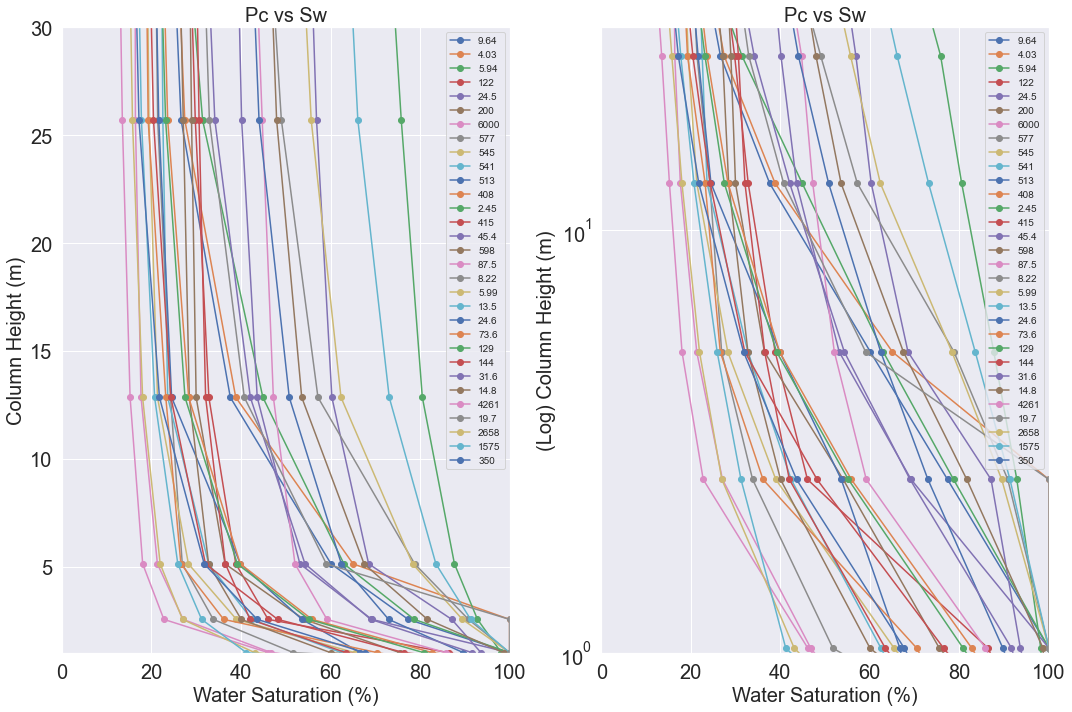

In [16]:
# Limits for plots
ylimit = 30 #Maximum column Height we are interested in
ylabel = 'Column Height (m)'
title = 'Pc vs Sw'

labels = df.loc[:, (df.columns != 'Pc_lab (psi)') & (df.columns != 'Pc_res (psi)') & (df.columns != 'Height (m)')].columns.values

x1 = df.loc[:, (df.columns != 'Pc_lab (psi)') & (df.columns != 'Pc_res (psi)') & (df.columns != 'Height (m)')].values
y1 = df['Height (m)']

plot_figure(nrows, ncols, height, width, a, x1, y1, 
            rotation, size, xlimit, ylimit, xlabel, ylabel, title, 
            labels, xmin, ymin
           )

plt.tight_layout()
plt.show()

#### Low Case - Poor Quality Reservoir (P10)

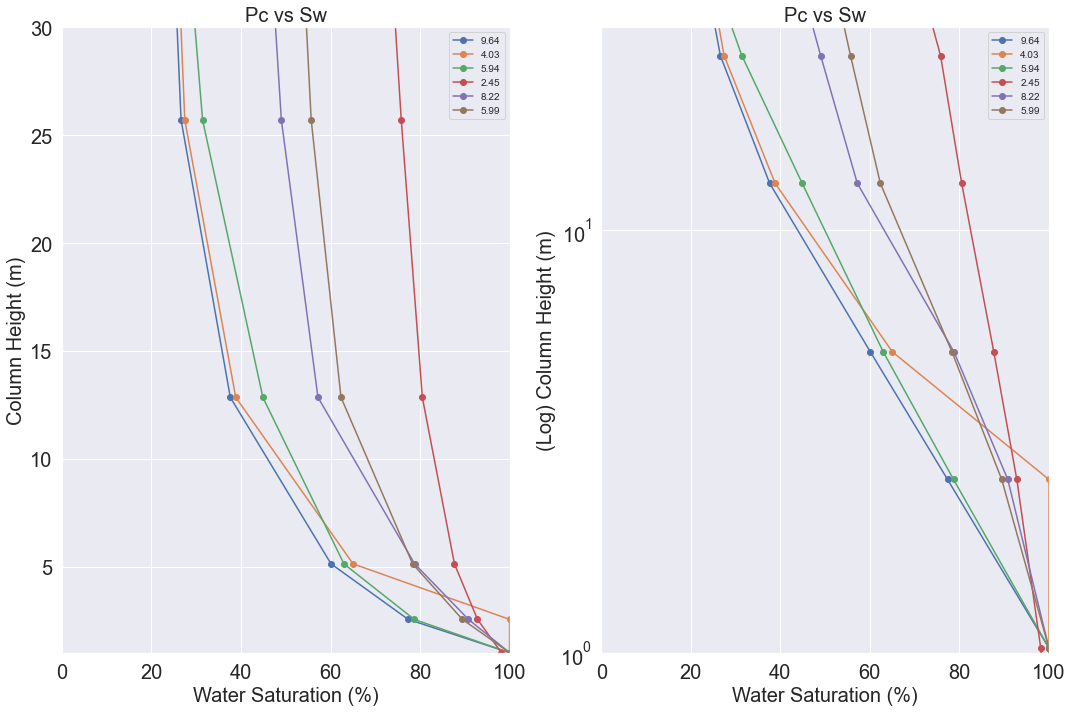

In [17]:
x1copy = df.copy()
x1copy = x1copy.drop(['Pc_lab (psi)','Pc_res (psi)', 'Height (m)'], axis = 1)
x_low = x1copy.loc[:, x1copy.columns.values.astype(float) < 10].values

labels_xlow = x1copy.loc[:, x1copy.columns.values.astype(float) < 10].columns.values

plot_figure(nrows, ncols, height, width, a, x_low, y1, 
            rotation, size, xlimit, ylimit, xlabel, ylabel, title, 
            labels_xlow, xmin, ymin
           )

plt.tight_layout()
plt.show()

#### Mid Case - Mid Quality Reservoir (P50)

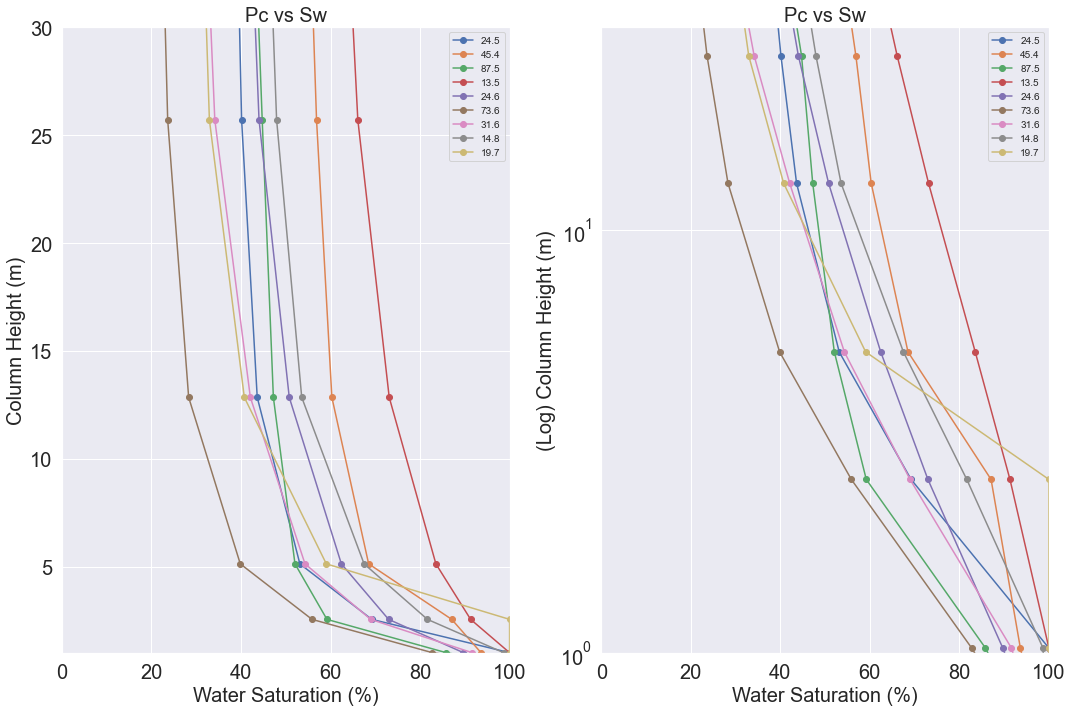

In [18]:
x_mid = x1copy.loc[:, (x1copy.columns.values.astype(float) > 10) & (x1copy.columns.values.astype(float) < 100)].values

labels_xmid = x1copy.loc[:, (x1copy.columns.values.astype(float) > 10) & (x1copy.columns.values.astype(float) < 100)].columns.values

plot_figure(nrows, ncols, height, width, a, x_mid, y1, 
            rotation, size, xlimit, ylimit, xlabel, ylabel, title, 
            labels_xmid, xmin, ymin
           )

plt.tight_layout()
plt.show()

#### High Case - Good Quality Reservoir (P90)

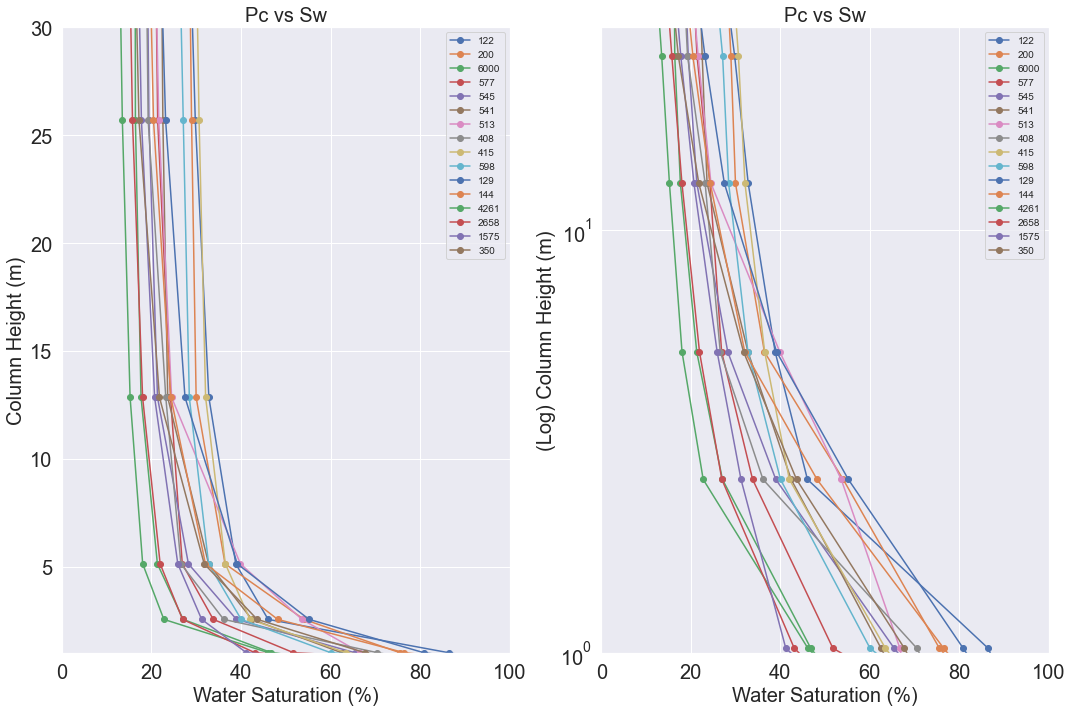

In [19]:
x_high = x1copy.loc[:, (x1copy.columns.values.astype(float) >= 100)].values

labels_xhigh = x1copy.loc[:, (x1copy.columns.values.astype(float) >= 100)].columns.values

plot_figure(nrows, ncols, height, width, a, x_high, y1, 
            rotation, size, xlimit, ylimit, xlabel, ylabel, title, 
            labels_xhigh, xmin, ymin
           )

plt.tight_layout()
plt.show()

#### Maximum Hydrocarbon Height Under Investigation

In [20]:
colh = 30
df['Dist_to_0 (m)'] = (df['Height (m)'] - colh).abs()
df.loc[df['Dist_to_0 (m)'].idxmin()]

Pc_lab (psi)     50.000000
9.64             26.609711
4.03             27.440024
5.94             31.410351
122              29.786993
24.5             40.133265
200              28.950217
6000             16.409670
577              21.386491
545              19.432616
541              22.542862
513              21.628445
408              19.257585
2.45             75.800000
415              30.633272
45.4             56.875110
598              27.100000
87.5             44.736461
8.22             49.014801
5.99             55.677915
13.5             66.097391
24.6             44.026817
73.6             23.621545
129              23.151885
144              20.447558
31.6             34.149505
14.8             47.955096
4261             13.489658
19.7             32.937745
2658             15.754560
1575             17.751912
350              17.203069
Pc_res (psi)     27.777778
Height (m)       25.720165
Dist_to_0 (m)     4.279835
Name: 9, dtype: float64

In [21]:
df.to_excel("PCSW_model_Height.xlsx", index = False)

# With this output, calculate Leverett J in spreadsheet.

### Leverett J function

##### This is a powerful diagnostic tool which normalises each capillary pressure curve to account for differences in fluid systems, sample permeability and porosity. The normalisation assumes porosity and permeability are closely related. The J function is plotted against wetting phase saturation (Sw) - if porosity and permeability are related, a consistent curve results

##### The goal is to see if each sample when converted to J values have similar pore size distributions and fall on the same trend - the trend should be defined as: log (Sw) = log a - b log (J). 

##### Something else that can be done with the J function is to determine the average capillary pressure, which is the representative capillary pressure of a reservoir layer.

In [22]:
# Header file comes preformatted as 1st row is variable name, 2nd row reads units
# Combines the first 2 rows of header into 1 header

df_J = pd.read_excel(
    'Pc_CPOC.xlsx', 
    sheet_name='J_fn',
    header=[0],  
    keep_default_na=True,
    usecols="A:AF",
    skipfooter = 13
    
)
df_J.columns=df_J.columns.to_flat_index()

df_Jmod = df_J.copy()
df_Jmod = df_Jmod.drop(['Pc_res (psi)'], axis = 1)
df_Jmod

,9.64,4.03,5.94,122.00,24.50,200.00,6000.00,577.00,545.00,541.00,...,73.60,129.00,144.00,31.60,14.80,4261.00,19.70,2658.00,1575.00,350.00
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001312,0.000883,0.000973,0.003989,0.001872,0.004823,0.024598,0.007965,0.007032,0.007017,...,0.002801,0.003766,0.003963,0.002067,0.001567,0.019231,0.001595,0.015332,0.012132,0.006051
2,0.002624,0.001765,0.001945,0.007977,0.003744,0.009647,0.049197,0.015930,0.014064,0.014035,...,0.005602,0.007532,0.007927,0.004135,0.003134,0.038463,0.003191,0.030664,0.024264,0.012102
3,0.006560,0.004414,0.004864,0.019943,0.009360,0.024117,0.122992,0.039824,0.035160,0.035087,...,0.014005,0.018830,0.019817,0.010336,0.007835,0.096157,0.007977,0.076661,0.060660,0.030255
4,0.013120,0.008827,0.009727,0.039886,0.018720,0.048235,0.245985,0.079648,0.070319,0.070174,...,0.028010,0.037660,0.039634,0.020673,0.015669,0.192313,0.015954,0.153321,0.121321,0.060509
5,0.032801,0.022068,0.024318,0.099714,0.046800,0.120587,0.614962,0.199119,0.175798,0.175436,...,0.070025,0.094150,0.099085,0.051682,0.039173,0.480783,0.039884,0.383303,0.303301,0.151273
6,0.065601,0.044136,0.048636,0.199428,0.093601,0.241174,1.229923,0.398238,0.351596,0.350871,...,0.140051,0.188300,0.198171,0.103364,0.078345,0.961566,0.079768,0.766607,0.606603,0.302546
7,0.131203,0.088272,0.097273,0.398855,0.187202,0.482349,2.459846,0.796476,0.703192,0.701743,...,0.280102,0.376599,0.396341,0.206728,0.156690,1.923133,0.159536,1.533213,1.213206,0.605092
8,0.328007,0.220680,0.243182,0.997138,0.468004,1.205872,6.149616,1.991189,1.757979,1.754357,...,0.700254,0.941498,0.990853,0.516819,0.391726,4.807832,0.398839,3.833033,3.033014,1.512730
9,0.656014,0.441360,0.486364,1.994277,0.936008,2.411744,12.299231,3.982379,3.515959,3.508714,...,1.400509,1.882996,1.981707,1.033638,0.783452,9.615663,0.797679,7.666067,6.066028,3.025460


In [23]:
dfmod = df.copy()
dfmod = dfmod.reset_index(drop=True)
dfmod = dfmod.drop(['Pc_lab (psi)','Pc_res (psi)', 'Height (m)','Dist_to_0 (m)'], axis = 1)
dfmod

,9.64,4.03,5.94,122.00,24.50,200.00,6000.00,577.00,545.00,541.00,...,73.60,129.00,144.00,31.60,14.80,4261.00,19.70,2658.00,1575.00,350.00
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,68.971058,100.000000,87.962162,77.439036,...,100.000000,100.000000,100.000000,100.000000,100.000000,73.374340,100.359274,71.434761,71.185073,83.010231
2,100.000000,100.000000,100.000000,86.366730,100.000000,75.513741,46.784119,51.725561,65.400766,62.469084,...,82.752434,80.821373,76.466512,91.631833,98.683806,46.133280,100.000000,43.096706,41.206010,67.680944
3,77.352760,100.000000,78.695615,46.059977,69.210928,54.049955,27.070517,33.803641,38.988491,42.422670,...,55.864482,55.195323,48.200687,68.979940,81.650865,22.767604,100.000000,26.934945,31.209986,43.620320
4,60.118696,65.040654,62.992700,38.837220,53.150715,36.439593,21.323098,26.881480,28.253973,32.772186,...,39.838950,39.172878,32.058370,54.298014,67.497937,18.035466,59.061828,21.939313,25.881862,31.781646
5,37.612945,38.826147,44.884257,32.819777,43.624851,29.976885,17.665995,24.258822,21.344647,23.626480,...,28.306427,27.487158,24.337879,42.087018,53.567252,15.222450,40.739787,18.017422,20.702464,21.782503
6,26.609711,27.440024,31.410351,29.786993,40.133265,28.950217,16.409670,21.386491,19.432616,22.542862,...,23.621545,23.151885,20.447558,34.149505,47.955096,13.489658,32.937745,15.754560,17.751912,17.203069
7,21.262846,22.349364,21.256741,26.054968,37.375388,27.494537,16.252012,19.893705,18.222144,21.556338,...,20.308834,19.505341,17.696686,28.819188,43.312972,11.474332,28.903653,13.586244,15.389962,14.376358
8,18.689313,20.011184,17.627185,23.895055,32.472200,24.497444,16.122010,18.391667,17.748440,20.419362,...,17.369363,16.097169,15.255753,24.708804,39.193872,7.605636,26.775368,10.569920,12.927765,12.374171
9,17.691695,19.067070,17.001872,22.380923,27.645396,21.726566,15.959984,16.157037,17.567769,19.406795,...,15.887873,14.199244,14.025525,23.335190,37.117851,6.278123,25.097434,8.661205,10.203772,8.402849


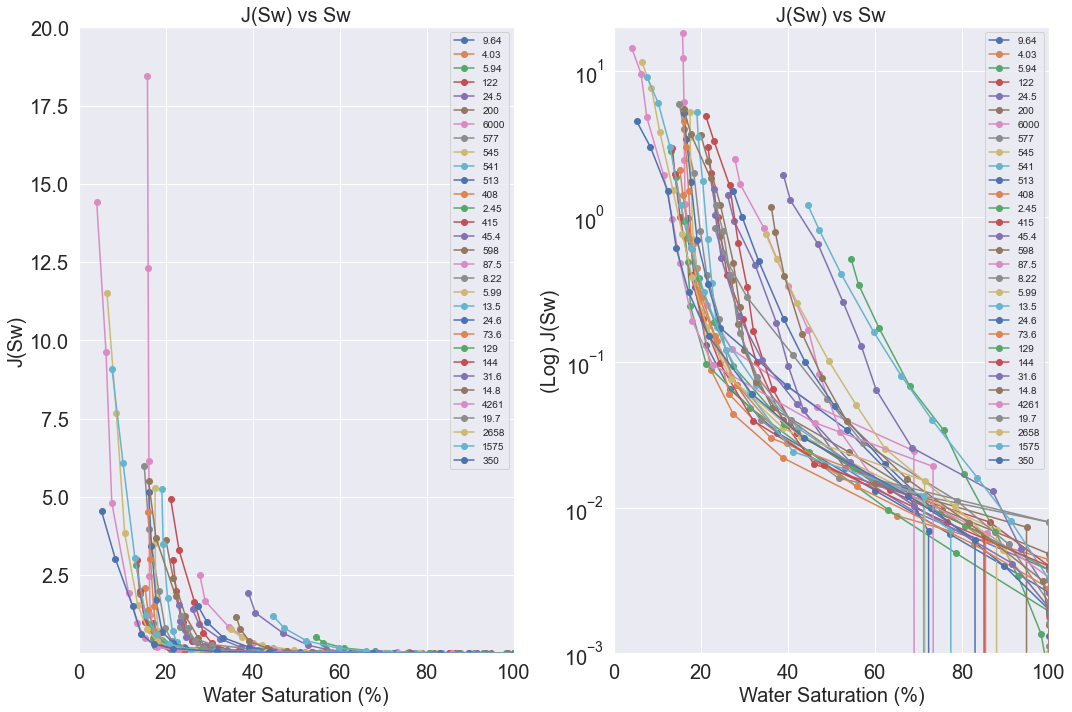

In [24]:
# Limits for plots
ymin = 0.001
ylimit = 20

xlabel = 'Water Saturation (%)'
ylabel = 'J(Sw)'
title = 'J(Sw) vs Sw'

labels_J = dfmod.columns.values

Jx1 = dfmod.values
Jy1 = df_Jmod.values

plot_figure(nrows, ncols, height, width, a, Jx1, Jy1, 
            rotation, size, xlimit, ylimit, xlabel, ylabel, title, 
            labels_J, xmin, ymin
           )

plt.tight_layout()
plt.show()

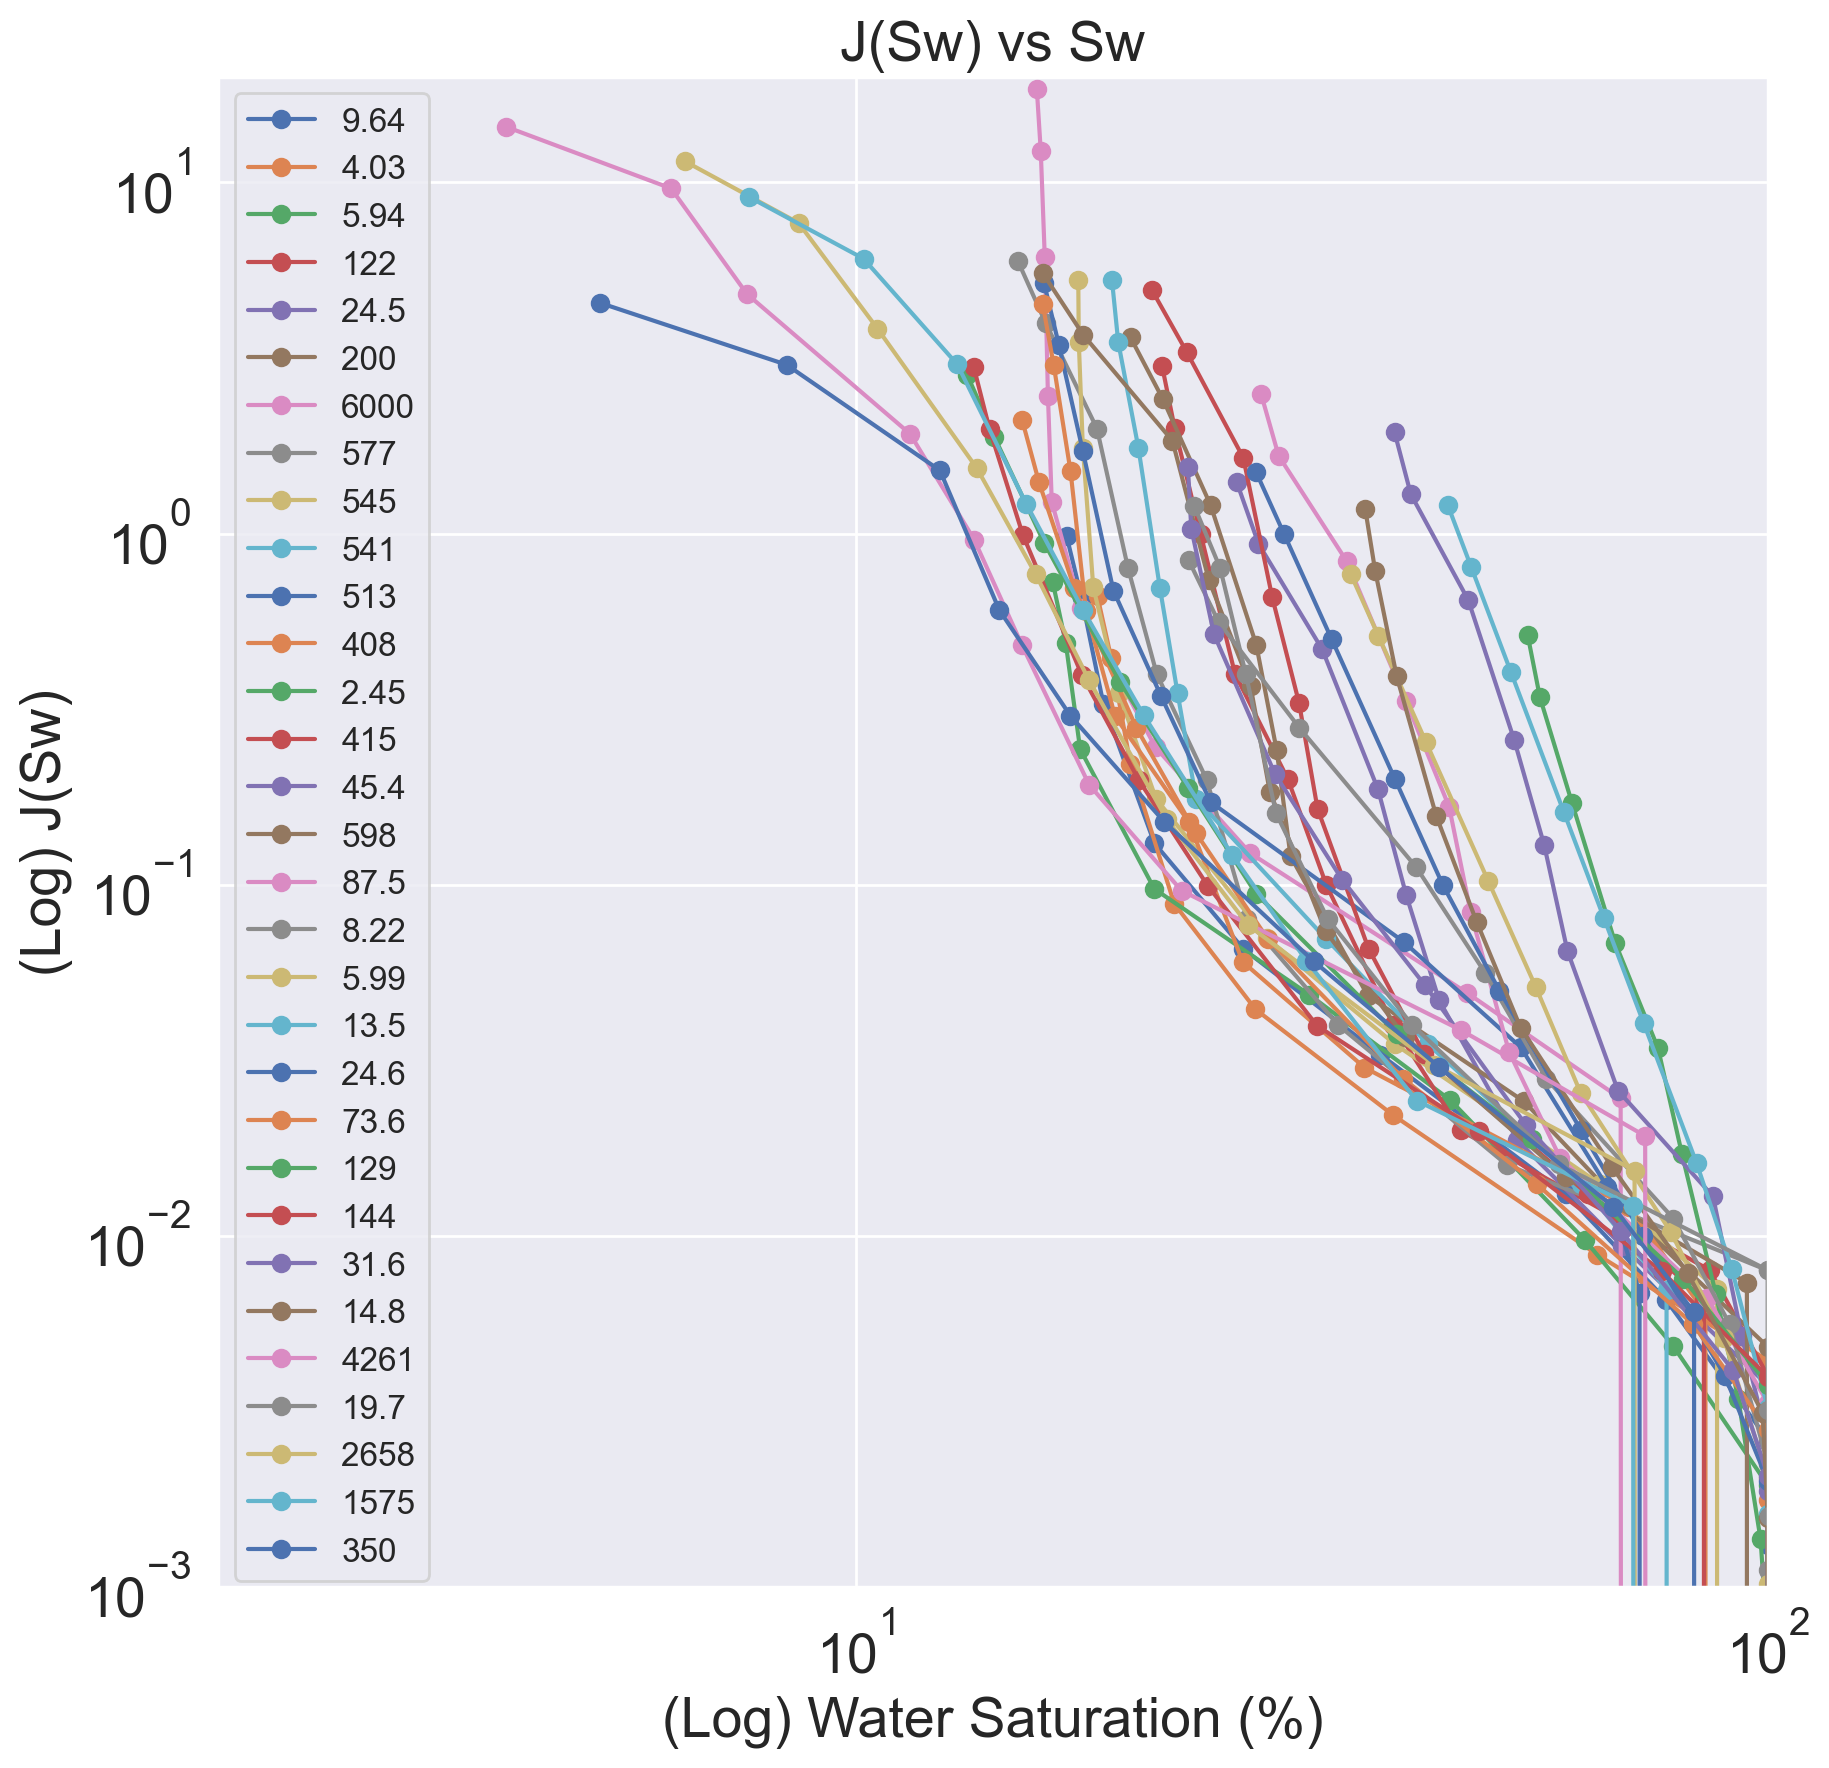

In [25]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=200)

xmin = 2
ymin = 0.001

plt.plot(Jx1, Jy1, 'o-', label=labels)
plt.xscale('log')
plt.yscale('log')
plt.xticks(rotation = rotation, fontsize=size)
plt.yticks(rotation = rotation, fontsize=size)
plt.xlim(xmin, xlimit)
plt.ylim(ymin, ylimit)
plt.xlabel('(Log) ' + xlabel, fontsize=size)
plt.ylabel('(Log) ' + ylabel, fontsize=size)
plt.title(title, fontsize=size)
plt.legend(loc='upper left', fontsize = size-8)

##### In a most general sense, the J function shows that there are similar pore size distribution and therefore similar irredicuble for a given capillary pressure value

### Plot Swirr Values, determine if correlation to k exists

In [26]:
# Header file comes preformatted as 1st row is variable name, 2nd row reads units
# Combines the first 2 rows of header into 1 header

df1 = pd.read_excel(
    'Pc_CPOC.xlsx', 
    header=[0, 1], 
    sheet_name='Char', 
    keep_default_na=True,
    #usecols="A,C:AA"

)
df1.columns=df1.columns.to_flat_index()
df1.ends(3)

C:\Users\mkumar\AppData\Local\Temp\ipykernel_13848\3237448987.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.head(x).append(df.tail(x))


,"(Well, ID)","(Sample, ID)","(Depth, m)","(K_klin, mD)","(Porosity, %)","(Swirr, %)"
0,Jengka West-1,103A,2751.65,9.64,15.7,26.609711
1,Jengka West-1,104A,2751.95,4.03,14.5,27.440024
2,Jengka West-1,208A,2765.35,5.94,17.6,31.410351
28,Muda-8,1-024,1757.27,2658.00,31.7,15.754560
29,Muda-8,1-029,1759.52,1575.00,30.0,17.751912
30,Muda-8,1-037,1764.91,350.00,26.8,17.203069


In [27]:
df1.columns.values

array([('Well', 'ID'), ('Sample', 'ID'), ('Depth', 'm'), ('K_klin', 'mD'),
       ('Porosity', '%'), ('Swirr', '%')], dtype=object)

In [28]:
# renaming the columns
df1.columns = ['Well ID', 'Sample ID', 'Depth (m)', 
              'K_Klin (mD)', 'Porosity (%)', 'SWIRR (%)'
             ]

In [29]:
df1.dtypes

Well ID          object
Sample ID        object
Depth (m)       float64
K_Klin (mD)     float64
Porosity (%)    float64
SWIRR (%)       float64
dtype: object

#### Mapping Each Well to a Colour

In [30]:
df_colors = pd.read_csv('https://raw.githubusercontent.com/codebrainz/color-names/master/output/colors.csv',header=None)
df_colors.columns = ['color_name', 'color_description', 'hex_value', 'r', 'g','b']

names = df1['Well ID'].unique()
c = df_colors[['hex_value']].astype(str).agg(','.join,axis=1).tolist()
colors = dict(zip(names,c))

df1['color'] = df1['Well ID'].apply(lambda x: colors[x])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Well ID       31 non-null     object 
 1   Sample ID     31 non-null     object 
 2   Depth (m)     31 non-null     float64
 3   K_Klin (mD)   31 non-null     float64
 4   Porosity (%)  31 non-null     float64
 5   SWIRR (%)     31 non-null     float64
 6   color         31 non-null     object 
dtypes: float64(4), object(3)
memory usage: 1.8+ KB


#df1.assign(indf = df1['Sample ID'].isin(df.columns.values).astype(int))          
           

#### Simple Linear Regression line fit to perm vs SWIRR

In [31]:
df1['ln_k'] = np.log(df1['K_Klin (mD)'].astype('float'))
df1

,Well ID,Sample ID,Depth (m),K_Klin (mD),Porosity (%),SWIRR (%),color,ln_k
0,Jengka West-1,103A,2751.65,9.64,15.70,26.609711,#5d8aa8,2.265921
1,Jengka West-1,104A,2751.95,4.03,14.50,27.440024,#5d8aa8,1.393766
2,Jengka West-1,208A,2765.35,5.94,17.60,31.410351,#5d8aa8,1.781709
3,Jengka-2,104A,2491.80,122.00,21.50,29.786993,#00308f,4.804021
4,Jengka-2,105A,2492.35,24.50,19.60,40.133265,#00308f,3.198673
5,Jengka-2,124A,2497.95,200.00,24.10,28.950217,#00308f,5.298317
6,Jengka-2,132A,2500.28,6000.00,27.80,16.409670,#00308f,8.699515
7,Jengka-2,137A,2501.92,577.00,25.50,21.386491,#00308f,6.357842
8,Muda-3,131A,1275.05,545.00,30.90,19.432616,#72a0c1,6.300786
9,Muda-3,137A,1276.90,541.00,30.80,22.542862,#72a0c1,6.293419


In [32]:
x_train = np.array(df1['ln_k']).reshape(-1, 1)
y_train = df1['SWIRR (%)']
print(x_train.shape)
print(y_train.shape)

(31, 1)
(31,)


In [33]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)
# The coefficients & intercept
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [-5.41007045]
Intercept:  57.20250635900955


In [34]:
from sklearn.metrics import r2_score

yhat = regr.predict(x_train)

print("Error Analysis:")
print("=================================================================")
print("Mean Absolute Error: %.3f" %np.mean(np.absolute(yhat - y_train)))
print("Residual Sum of Squares (MSE): %.3f" %np.mean((yhat - y_train)**2))
print("R2-score: %.3f" %r2_score(yhat, y_train))

Error Analysis:
Mean Absolute Error: 7.733
Residual Sum of Squares (MSE): 110.016
R2-score: 0.157


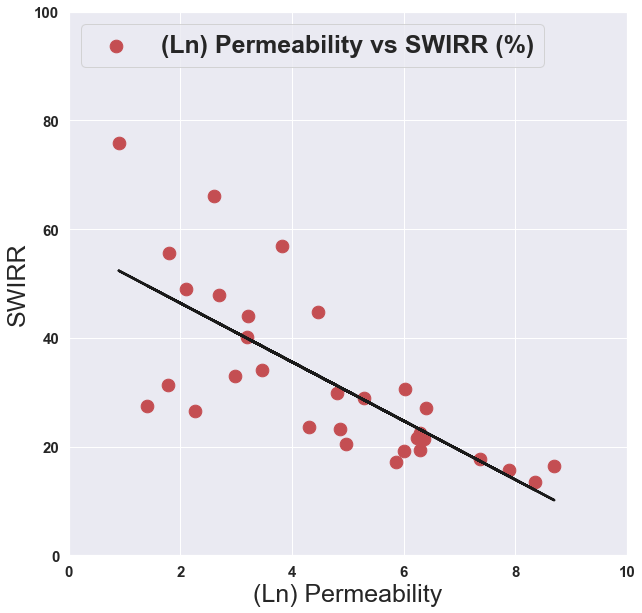

In [37]:
RedFunction = x_train # x-value
BlueFunction = y_train # y-value
LineFunction = regr.coef_[0]*x_train + regr.intercept_

label = "(Ln) Permeability vs SWIRR (%)"
title = label
xlabel = '(Ln) Permeability'
ylabel = 'SWIRR'

plot_Scatter_with_line(RedFunction, BlueFunction, LineFunction, label, xlabel, ylabel, title)

In [36]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

Completed Process in 6.3501200675964355 seconds
